# Import Stataments

In [1]:
#Basec Import Statements
import pandas as pd
import numpy as np
import json

#Plot Import Statements
import seaborn as sns
import matplotlib.pyplot as plt

#To Ignore Warnings in Output
import warnings
warnings.filterwarnings('ignore')

## Converting Json files to Dataframe

###### Review file

In [ ]:
#since pd.readjson will cause memeory error, we read the file line by line
path = '../data/input_json_files/yelp_academic_dataset_review.json'
review = []
with open(path, encoding = 'utf-8') as fin:
    for line in fin:
        line_contents = json.loads(line)
        review.append(line_contents)

In [ ]:
review = pd.DataFrame(review)
review.shape

In [ ]:
review.head()

In [ ]:
#Dropping unnecessary columns in review file.
review = review.drop(['text','useful','cool', 'date', 'funny'], axis = 1)
review.to_csv('../data/output_csv/review.csv',index = False)

###### User file

In [ ]:
#since pd.readjson will cause memeory error, we read the file line by line
path = '../data/input_json_files/yelp_academic_dataset_user.json'
user = []
with open(path, encoding = 'utf-8') as fin:
    for line in fin:
        line_contents = json.loads(line)
        user.append(line_contents)

In [ ]:
user = pd.DataFrame(user)
user.shape

In [ ]:
user.head()

###### Business file

In [2]:
#since pd.readjson will cause memeory error, we read the file line by line
path = '../data/input_json_files/yelp_academic_dataset_business.json'
business = []
with open(path, encoding = 'utf-8') as fin:
    for line in fin:
        line_contents = json.loads(line)
        business.append(line_contents)

In [3]:
business = pd.DataFrame(business)
business.shape

(150346, 14)

In [4]:
business.to_csv('../data/output_csv/business.csv',index = False)
business = pd.read_csv('../data/output_csv/business.csv')
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


## Data Cleaning

In [5]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [6]:
# Recommendations will be valid only if the business is still open
# 1 = open, 0 = closed
business = business[business['is_open']==1]

In [7]:
business.isnull().sum()

business_id         0
name                0
address          4643
city                0
state               0
postal_code        40
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      12348
categories         95
hours           16095
dtype: int64

In [8]:
# let remove the rows for which categories are not mentioned
business = business.dropna(subset=['categories']).reset_index(drop = True)

In [9]:
business.shape

(119603, 14)

In [10]:
business.to_csv('../data/output_csv/business.csv',index = False)
business = pd.read_csv('../data/output_csv/business.csv')
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
1,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
2,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
3,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
4,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."


In [11]:
business_overall = business.assign(categories = business.categories.str.split(', ')).explode('categories')
cat = business_overall.categories.value_counts()
cat = cat.to_frame().reset_index()
cat.columns = ['Categories', 'Count']
cat

,Categories,Count
0,Restaurants,34987
1,Food,20419
2,Shopping,20186
3,Home Services,13322
4,Beauty & Spas,12263
...,...,...
1297,Guamanian,1
1298,Cheese Tasting Classes,1
1299,Bike Repair,1
1300,Tonkatsu,1


In [12]:
cat= cat.sort_values(by = 'Count', ascending = False)

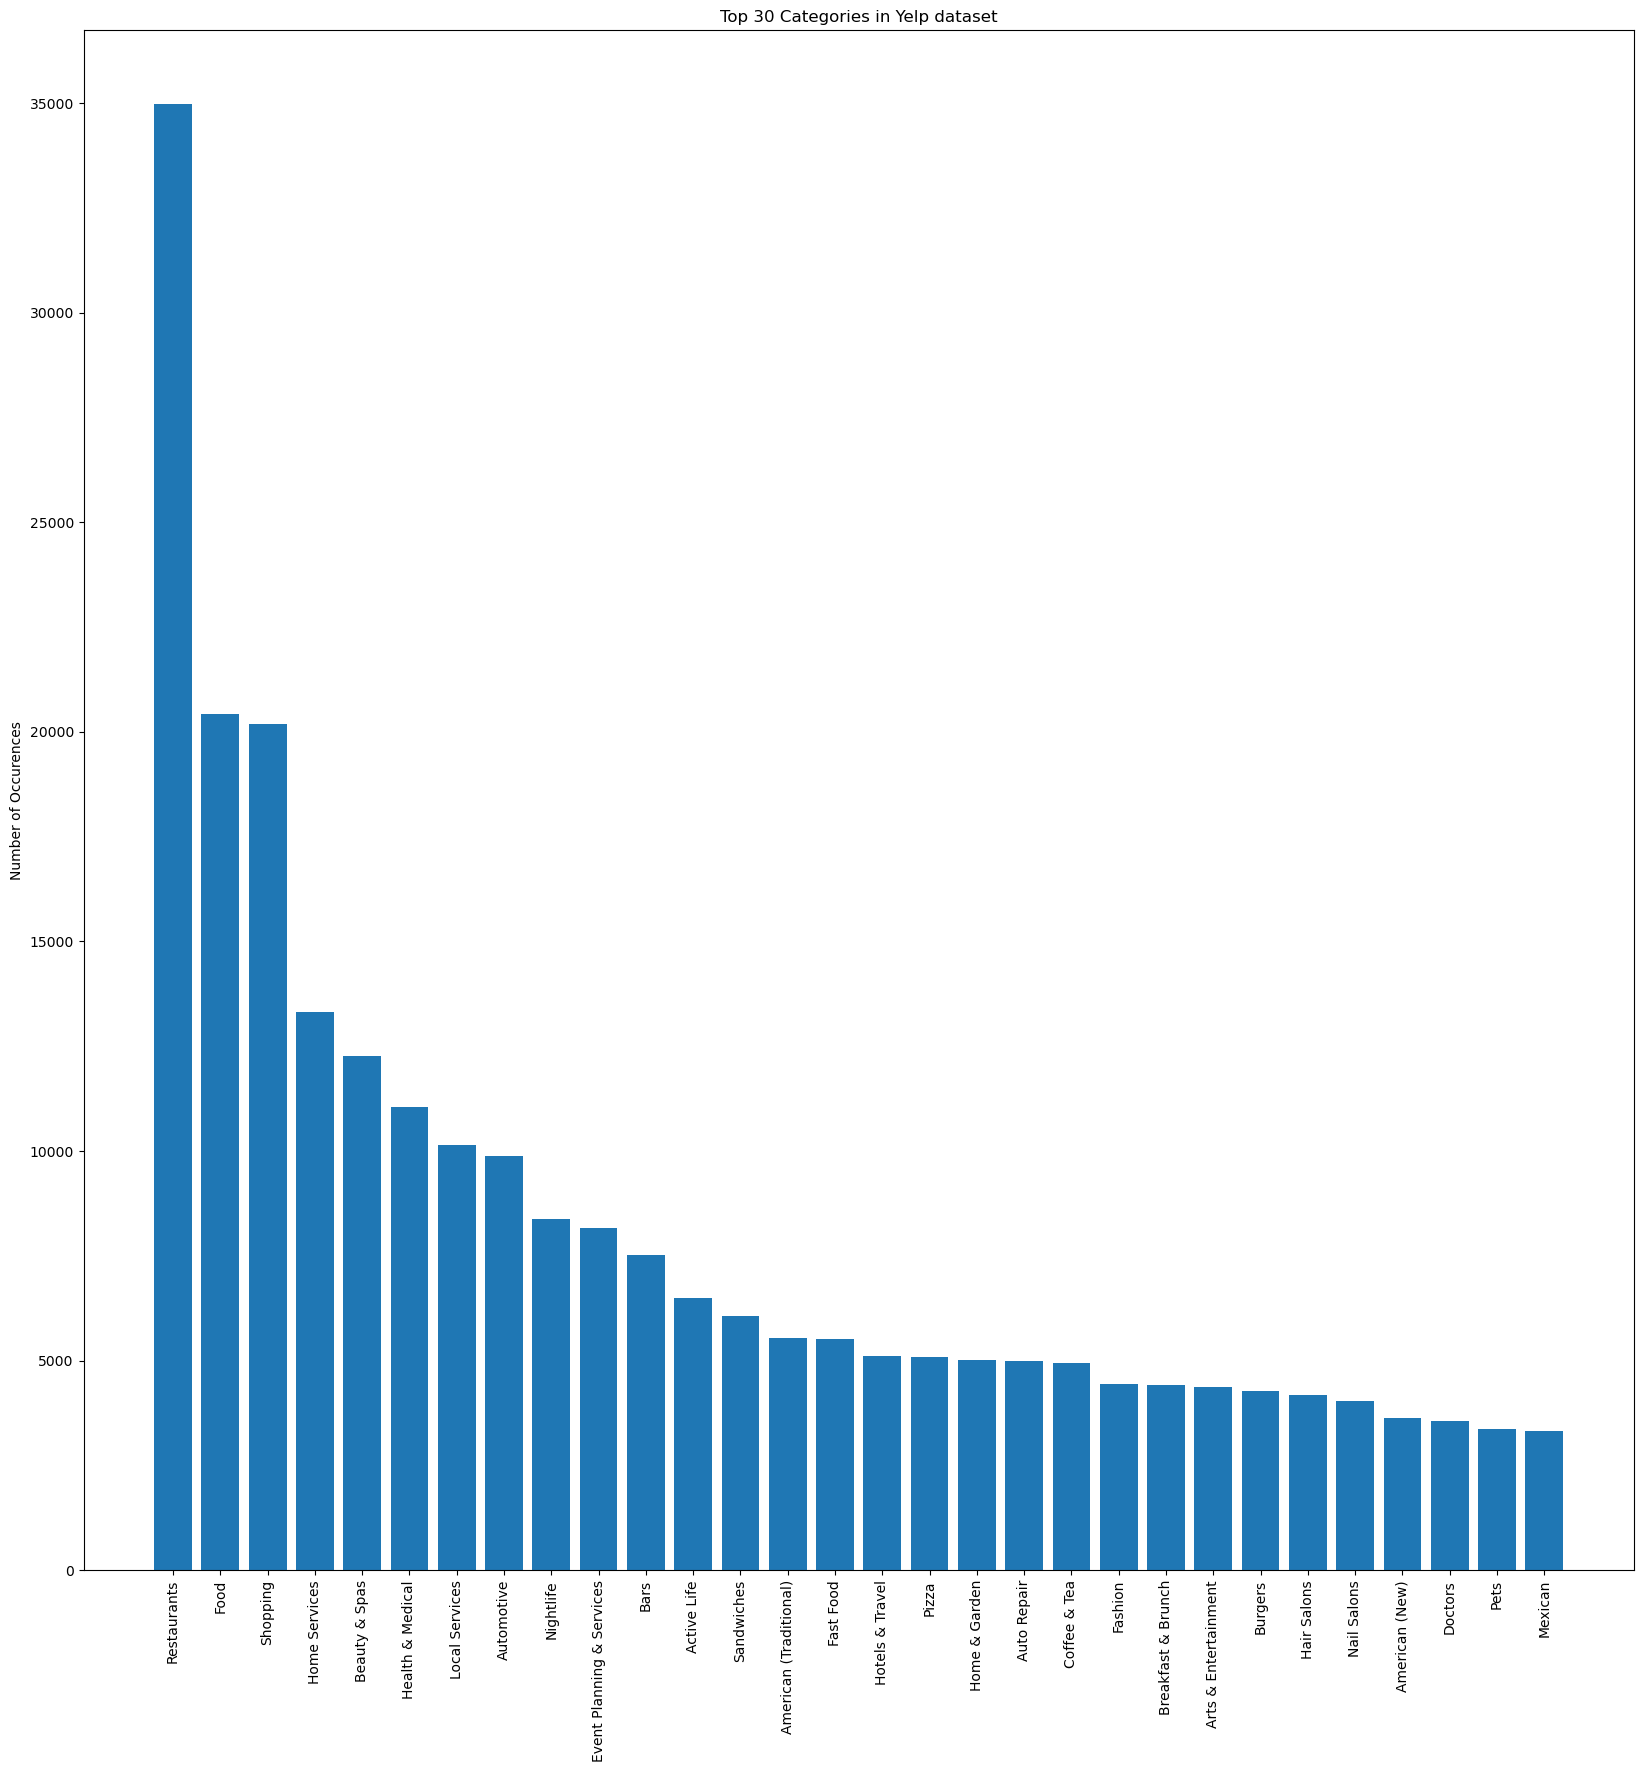

In [13]:
cat = cat[0:30]
objects = list(cat.Categories)
y_pos = np.arange(len(objects))
Numbers = list(cat.Count)

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
plt.bar(y_pos, Numbers, align='center', alpha=1)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Number of Occurences')
plt.title('Top 30 Categories in Yelp dataset')
plt.show()

In [14]:
b = pd.DataFrame()
food_category_filter = ['Restaurants' , 'Food' , 'Bars' , 'Sandwiches' , 'Fast Food','Pizza' , 
                        'Coffee & Tea','Breakfast & Brunch','Burgers']

In [15]:
for index, row in business.categories.items():
    for i in range(len(food_category_filter)):
        try:
            if food_category_filter[i] in row:
                b = b.append(business.iloc[index])
                break
        except:
            print(index)
            print(food_category_filter[i])
            print(business.iloc[index])

In [16]:
business = b.reset_index(drop = True)

In [17]:
business.to_csv('../data/output_csv/business.csv',index = False)
business = pd.read_csv('../data/output_csv/business.csv')
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
2,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ""'casual'"", 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ""'none'"", 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


In [18]:
business.shape

(46134, 14)

<AxesSubplot:xlabel='state', ylabel='count'>

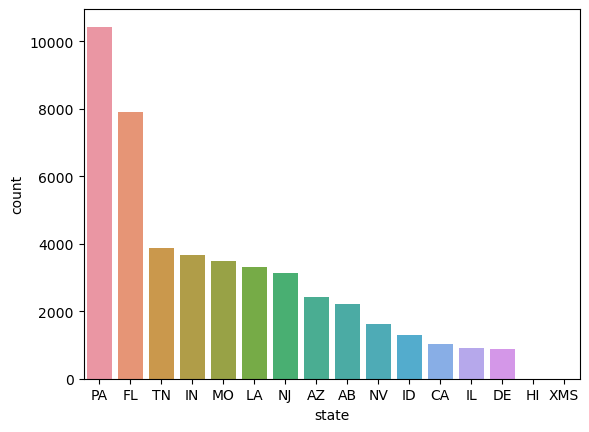

In [19]:
#Count of restaurants in each location
sns.countplot(data = business,x = 'state',
             order = business['state'].value_counts().index
             )

In [20]:
#Since PA has the most number of observations, we will use only the restaurants in PA region for our analysis
business = business[business['state'] == 'PA'].reset_index(drop = True)

In [21]:
business.to_csv('../data/output_csv/business.csv',index = False)
business = pd.read_csv('../data/output_csv/business.csv')
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
1,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
3,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
4,kV_Q1oqis8Qli8dUoGpTyQ,Ardmore Pizza,10 Rittenhouse Pl,Ardmore,PA,19003,40.006707,-75.289671,3.5,109,1,"{'RestaurantsGoodForGroups': 'True', 'WiFi': ""...","Pizza, Restaurants","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ..."
